<a href="https://colab.research.google.com/github/Shaheer04/ML-OpenEnded/blob/main/ML_OpenEnded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Performance  22F-BSAI-14

In [97]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


In [9]:
data_1 = pd.read_csv("/content/student-mat.csv", sep=";")      # Student_mat

In [11]:
data_2 = pd.read_csv("/content/student-por.csv", sep=";")      # Student_por

In [10]:
data_1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [12]:
data_2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [22]:
# Selecting Data_1 as it has more rows than Data_2

data_1.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


In [23]:
# Checking for missing data to decide if imputation is needed

data_1.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [25]:
# Understand Distribution of Numerical Features
data_1.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [26]:
data_1['G3'].describe()

,G3
count,395.000000
mean,10.415190
std,4.581443
min,0.000000
25%,8.000000
50%,11.000000
75%,14.000000
max,20.000000


In [28]:
# Target Variable (G3) Distribution
data_1['G3'].value_counts().sort_index()

,count
G3,
0,38
4,1
5,7
6,15
7,9
8,32
9,28
10,56
11,47


In [30]:
# Correlations of Variable with G3

numeric_cols = data_1.select_dtypes(include=[np.number]).columns
correlations = data_1[numeric_cols].corr()['G3'].sort_values(ascending=False)
correlations

,G3
G3,1.000000
G2,0.904868
G1,0.801468
Medu,0.217147
Fedu,0.152457
studytime,0.097820
famrel,0.051363
absences,0.034247
freetime,0.011307
Walc,-0.051939


In [34]:
print("\n8. Key insights From Dataset:")

print(f"- Average final grade (G3): {data_1['G3'].mean():.2f}")
print(f"- Students who passed (G3 >= 10): {(data_1['G3'] >= 10).sum()} ({(data_1['G3'] >= 10).mean()*100:.1f}%)")
print(f"- Students who failed (G3 < 10): {(data_1['G3'] < 10).sum()} ({(data_1['G3'] < 10).mean()*100:.1f}%)")
print(f"- Average study time: {data_1['studytime'].mean():.2f}")
print(f"- Students with failures: {(data_1['failures'] > 0).sum()}")


8. Key insights From Dataset:
- Average final grade (G3): 10.42
- Students who passed (G3 >= 10): 265 (67.1%)
- Students who failed (G3 < 10): 130 (32.9%)
- Average study time: 2.04
- Students with failures: 83


In [39]:
# Select features based on objective + strongest predictors from correlation
# - studytime: study hours per week
# - absences: attendance (inverse - more absences = worse attendance)
# - G1, G2: assignment/test scores throughout the year
# - failures: number of past class failures (STRONG negative predictor: -0.36)

selected_features = ['studytime', 'absences', 'failures', 'G1', 'G2']

In [60]:
# Prepare data for regression
X_reg = data_1[selected_features]
y_reg = data_1['G3']  # Target: final grade

In [61]:
# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)
# WHY: 80% training, 20% testing to evaluate on unseen data

In [62]:
print(f"\n3. Train/Test Split:")
print(f"   Training samples: {len(X_train_reg)}")
print(f"   Testing samples: {len(X_test_reg)}")


3. Train/Test Split:
   Training samples: 316
   Testing samples: 79


In [63]:
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)
# WHY: Standardize features so all have same scale (mean=0, std=1)

In [66]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_reg_scaled, y_train_reg)
# WHY: Learn linear relationship between features and G3

LinearRegression()

In [67]:
# Predictions
y_pred_train_reg = lr_model.predict(X_train_reg_scaled)
y_pred_test_reg = lr_model.predict(X_test_reg_scaled)

In [71]:
#  Evaluate
mse_train = mean_squared_error(y_train_reg, y_pred_train_reg)
mse_test = mean_squared_error(y_test_reg, y_pred_test_reg)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train_reg, y_pred_train_reg)
r2_test = r2_score(y_test_reg, y_pred_test_reg)

In [75]:
print(f"\n5. Linear Regression Results:")
print(f"\n   Training Performance:")
print(f"     MSE:  {mse_train:.4f}")
print(f"     RMSE: {rmse_train:.4f}")
print(f"     R²:   {r2_train:.4f}")
# R² shows how much variance is explained (higher is better, max=1.0)
# RMSE shows average prediction error in grade points


5. Linear Regression Results:

   Training Performance:
     MSE:  3.4019
     RMSE: 1.8444
     R²:   0.8380


In [73]:
print(f"\n   Testing Performance:")
print(f"     MSE:  {mse_test:.4f}")
print(f"     RMSE: {rmse_test:.4f}")
print(f"     R²:   {r2_test:.4f}")


   Testing Performance:
     MSE:  4.4665
     RMSE: 2.1134
     R²:   0.7822


In [74]:
print(f"\n6. Feature Coefficients (impact on G3):")
for feature, coef in zip(selected_features, lr_model.coef_):
    print(f"   {feature:12s}: {coef:7.4f}")
# Shows how much each feature affects final grade


6. Feature Coefficients (impact on G3):
   studytime   : -0.0595
   absences    :  0.3300
   failures    : -0.3348
   G1          :  0.4640
   G2          :  3.6735


# Part 2 Classification Pass/Fail

In [77]:
# Create pass/fail target
data_1['pass'] = (data_1['G3'] >= 10).astype(int)
# WHY: Binary target - pass=1 if G3>=10, fail=0 otherwise (Portuguese system)

In [79]:
print(f"\n1. Target Variable (Pass/Fail):")
print(f"   Pass (G3 >= 10): {data_1['pass'].sum()} students ({data_1['pass'].mean()*100:.1f}%)")
print(f"   Fail (G3 < 10):  {(data_1['pass']==0).sum()} students ({(1-data_1['pass'].mean())*100:.1f}%)")



1. Target Variable (Pass/Fail):
   Pass (G3 >= 10): 265 students (67.1%)
   Fail (G3 < 10):  130 students (32.9%)


In [82]:
# Prepare data for classification
X_clf = data_1[selected_features]
y_clf = data_1['pass']

In [83]:
# Split data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)
# WHY: stratify ensures same pass/fail ratio in train and test sets

In [84]:
# Scale features
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

In [85]:
print(f"\n2. Classification Data Split:")
print(f"   Training samples: {len(X_train_clf)}")
print(f"   Testing samples: {len(X_test_clf)}")


2. Classification Data Split:
   Training samples: 316
   Testing samples: 79


In [86]:
# Train Logistic Regression
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_clf_scaled, y_train_clf)
# WHY: Estimates probability of passing using logistic function

LogisticRegression(max_iter=1000, random_state=42)

In [88]:
# Predictions
y_pred_train_log = log_model.predict(X_train_clf_scaled)
y_pred_test_log = log_model.predict(X_test_clf_scaled)

In [89]:
# Evaluate
acc_train_log = accuracy_score(y_train_clf, y_pred_train_log)
acc_test_log = accuracy_score(y_test_clf, y_pred_test_log)
prec_test_log = precision_score(y_test_clf, y_pred_test_log)
rec_test_log = recall_score(y_test_clf, y_pred_test_log)
cm_log = confusion_matrix(y_test_clf, y_pred_test_log)

In [90]:
print(f"\nTraining Accuracy: {acc_train_log:.4f}")
print(f"\nTesting Performance:")
print(f"  Accuracy:  {acc_test_log:.4f}")
print(f"  Precision: {prec_test_log:.4f}")
print(f"  Recall:    {rec_test_log:.4f}")
# WHY: Accuracy = % correct, Precision = % of predicted passes that are correct,
#      Recall = % of actual passes identified


Training Accuracy: 0.9146

Testing Performance:
  Accuracy:  0.8861
  Precision: 0.9400
  Recall:    0.8868


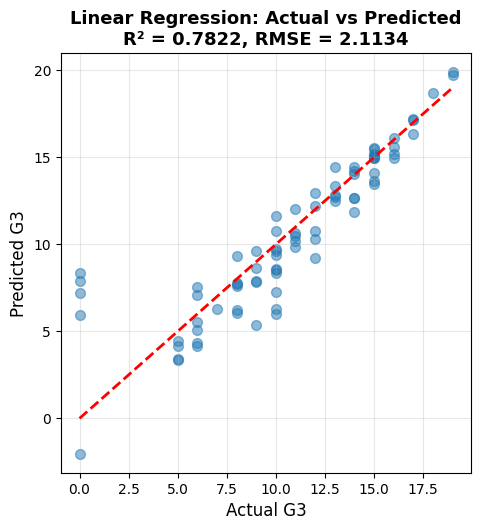

In [94]:
# Create comprehensive visualization
fig = plt.figure(figsize=(18, 12))

# 1. Linear Regression: Actual vs Predicted G3
ax1 = plt.subplot(2, 3, 1)
plt.scatter(y_test_reg, y_pred_test_reg, alpha=0.5, s=50)
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Actual G3', fontsize=12)
plt.ylabel('Predicted G3', fontsize=12)
plt.title(f'Linear Regression: Actual vs Predicted\nR² = {r2_test:.4f}, RMSE = {rmse_test:.4f}',
          fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
# WHY: Points near red line = good predictions, far = poor predictions

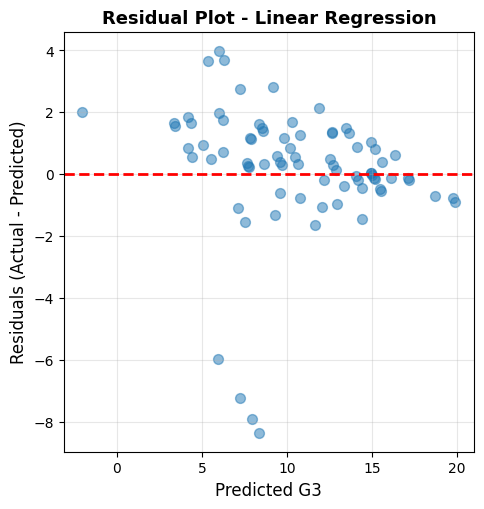

In [101]:
fig = plt.figure(figsize=(18, 12))

# 2. Linear Regression: Residuals
ax2 = plt.subplot(2, 3, 2)
residuals = y_test_reg - y_pred_test_reg
plt.scatter(y_pred_test_reg, residuals, alpha=0.5, s=50)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted G3', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.title('Residual Plot - Linear Regression', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
# WHY: Points randomly scattered around 0 = good model fit

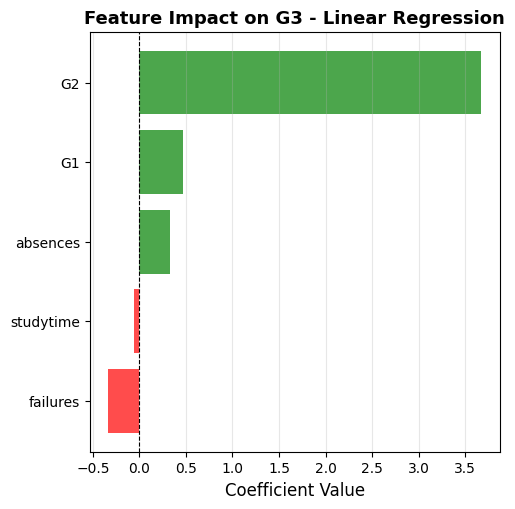

In [102]:
# 3. Feature Coefficients - Linear Regression
fig = plt.figure(figsize=(18, 12))

ax3 = plt.subplot(2, 3, 3)
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', ascending=True)
colors_reg = ['red' if x < 0 else 'green' for x in coef_df['Coefficient']]
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors_reg, alpha=0.7)
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Feature Impact on G3 - Linear Regression', fontsize=13, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
# WHY: Positive = increases G3, Negative = decreases G3

Text(0.5, 102.72222222222219, 'Predicted')

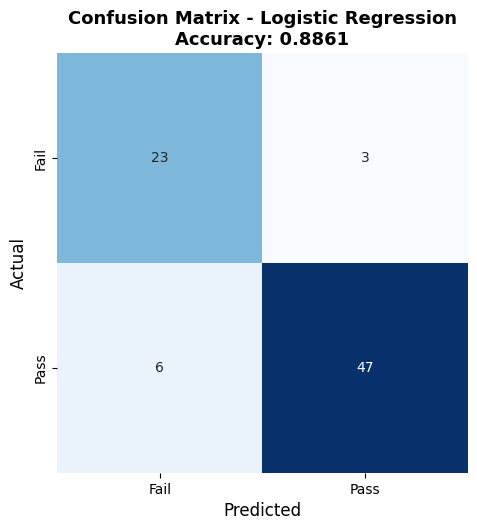

In [103]:
# 4. Confusion Matrix - Logistic Regression

fig = plt.figure(figsize=(18, 12))

ax4 = plt.subplot(2, 3, 4)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.title(f'Confusion Matrix - Logistic Regression\nAccuracy: {acc_test_log:.4f}',
          fontsize=13, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
# WHY: Shows correct and incorrect classifications

## Summary

In [99]:
print("\n1. LINEAR REGRESSION (Predicting G3):")
print(f"   ✓ R² Score: {r2_test:.4f} - Model explains {r2_test*100:.1f}% of variance in final grades")
print(f"   ✓ RMSE: {rmse_test:.4f} - Average prediction error is {rmse_test:.2f} grade points")
print(f"   ✓ Most important features: G2, G1, failures")


1. LINEAR REGRESSION (Predicting G3):
   ✓ R² Score: 0.7822 - Model explains 78.2% of variance in final grades
   ✓ RMSE: 2.1134 - Average prediction error is 2.11 grade points
   ✓ Most important features: G2, G1, failures


In [100]:
print("\n2. CLASSIFICATION (Predicting Pass/Fail):")
print(f"\n   Logistic Regression:")
print(f"   ✓ Accuracy:  {acc_test_log:.4f} - Correctly classifies {acc_test_log*100:.1f}% of students")
print(f"   ✓ Precision: {prec_test_log:.4f} - {prec_test_log*100:.1f}% of predicted passes are correct")
print(f"   ✓ Recall:    {rec_test_log:.4f} - Identifies {rec_test_log*100:.1f}% of actual passes")



2. CLASSIFICATION (Predicting Pass/Fail):

   Logistic Regression:
   ✓ Accuracy:  0.8861 - Correctly classifies 88.6% of students
   ✓ Precision: 0.9400 - 94.0% of predicted passes are correct
   ✓ Recall:    0.8868 - Identifies 88.7% of actual passes
